In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

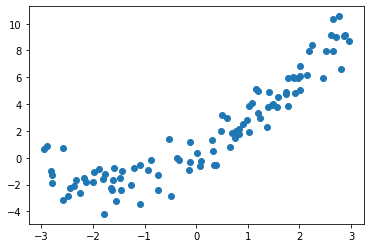

In [8]:
plt.scatter(x, y)
plt.show()

# 使用线性回归

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [64]:
lin_reg.score(X, y)

0.8331130304439143

In [11]:
y_predict = lin_reg.predict(X)

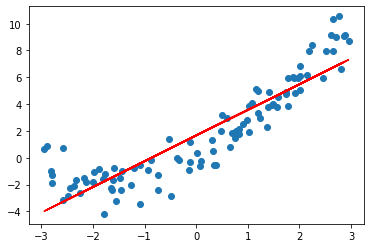

In [12]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='red')
plt.show()

# 解决方案，添加一个特征

In [13]:
(X ** 2).shape

(100, 1)

In [14]:
X2 = np.hstack([X, X ** 2])
X2.shape

(100, 2)

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

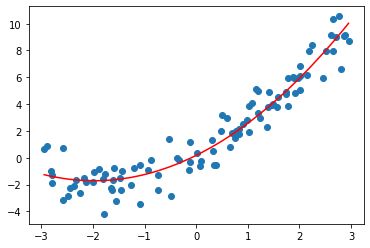

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='red')
plt.show()

# scikit-learn的多项式回归和Pipeline：拟合非线性数据

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [38]:
X2.shape

(100, 3)

In [39]:
X2[:5,:]

array([[ 1.00000000e+00,  1.59820199e+00,  2.55424959e+00],
       [ 1.00000000e+00,  1.40578187e+00,  1.97622267e+00],
       [ 1.00000000e+00, -1.26381820e+00,  1.59723644e+00],
       [ 1.00000000e+00, -1.41298333e+00,  1.99652188e+00],
       [ 1.00000000e+00, -3.54720869e-03,  1.25826895e-05]])

In [40]:
X[:5,:]

array([[ 1.59820199],
       [ 1.40578187],
       [-1.2638182 ],
       [-1.41298333],
       [-0.00354721]])

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression()

In [42]:
y_predict2 = lin_reg2.predict(X2)

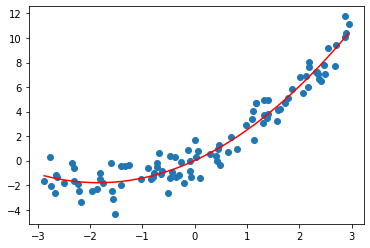

In [43]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='red')
plt.show()

In [46]:
lin_reg2.intercept_

0.009054143228986788

In [45]:
lin_reg2.coef_

array([0.        , 1.96306688, 0.53228148])

# 关于polynomialFeatures

In [47]:
X = np.arange(1, 11).reshape(-1, 2)

In [48]:
X.shape

(5, 2)

In [49]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [50]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [51]:
X2.shape

(5, 6)

In [52]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [53]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [54]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

# pipeline

In [57]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [59]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

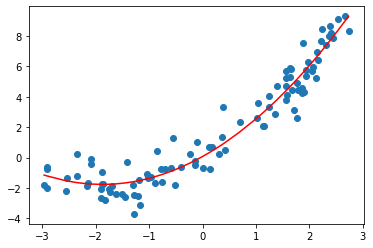

In [60]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')
plt.show()